# NLP

In [1]:
!nvidia-smi -L                   #L for light

GPU 0: Tesla T4 (UUID: GPU-897884af-874c-c4ec-e5a4-3829664b4fde)


## Get the helper function

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-03 18:05:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-03 18:05:52 (119 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Text Dataset

### Download the data

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-07-03 18:05:56--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.31MB/s    in 0.4s    

2023-07-03 18:05:57 (1.31 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

### Visualize our text dataset

In [6]:
import pandas as pd
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train['text'][2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [ ]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
disaster = 0
not_disaster = 0
for target in train['target']:
  if target == 1:
    disaster+=1
  else:
    not_disaster+=1

In [ ]:
print(f'Disaster label is {disaster}')
print(f'Not Disaster {not_disaster}')

Disaster label is 3271
Not Disaster 4342


In [ ]:
# or we can use function do the same jop as above
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train), len(test)

(7613, 3263)

### Shuffle the dataset

In [ ]:
train_shuffled = train.sample(frac=1, random_state=42)  #sample is pandas method
train_shuffled.head()                                   #frac for the size of the data will be shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


### Visualize random data

In [ ]:
import random
random_index = random.randint(0, len(train)-2)                                           #The negative number refare to examples
for row in train_shuffled[["text", "target"]][random_index:random_index+2].itertuples():
  _,text,target = row
  print(f"Target: {target}", "(real disaster)" if target>0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
Freed #BokoHaram captives speak up: ÛÏI will make sure she goes to school.' @guardian http://t.co/PK8dgVripw http://t.co/RZ0adzursW

---

Target: 1 (real disaster)
Text:
@KhalidKKazi mate they've taken another 2 since I posted this tweet it's pandemonium

---



### Splite the data into training and validation sets

We will create validation data set from the training one becuase the testing set dont have label, so we can't create validation set from it.

In [ ]:
from sklearn.model_selection import train_test_split
training, validation, training_labels, validation_labels = train_test_split(train_shuffled['text'].to_numpy(),  #X #to_numpy becuse train_test_split expect things as numpy
                                                                            train_shuffled["target"].to_numpy(), #y
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
len(training), len(training_labels)

(6851, 6851)

In [ ]:
len(validation), len(validation_labels)

(762, 762)

In [ ]:
training[:9], training_labels[:9]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.'],
       dtype=object),
 array([0, 0, 1, 0, 0, 1, 1, 0, 1]))

## Convert text to numbers (Tokenization)

There's word level and latter level Tocanization,we may use one-hot encoding to represent them.

Each vector in embedding represent on word with dimintion of 128, 512,... .

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None, # who many words in my vocabulary
                                    standardize= 'lower_and_strip_punctuation', # make all latters in small case and deleat all punctuations
                                    split = 'whitespace', # space between the words
                                    ngrams=None, # group of words
                                    output_mode = 'int', # Who to map tokens to numbers
                                    output_sequence_length=None, # Who long the sequence will be
                                    pad_to_max_tokens = False)

In [ ]:
# Find the average number of tokens in each tweets
round(sum(len(i.split()) for i in training)/len(training))

15

In [ ]:
text_vectorizer = TextVectorization(max_tokens= 10000,
                                       output_mode='int',
                                       output_sequence_length = 15)

In [ ]:
text_vectorizer.adapt(training)

In [ ]:
sample_sentence =  "There's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Vectorize a random sentence of our data
import random
random_sentence = random.choice(training)
print(f"The sentence:\n {random_sentence}\n\nThe vectorization:")
text_vectorizer([random_sentence])

The sentence:
 VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterranean after a boat carryi...

The vectorization:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 72,  67, 728,  27, 713,  20, 190, 341,  22, 669,  10, 482,   6,
        330,   4]])>

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Words in vocab:\n {words_in_vocab}")
print(f"The number of vocab in vocabulary: {len(words_in_vocab)}\n")
print(f"Top 5 words:\n {top_5_words}\n")
print(f"Bottom 5 words:\n {bottom_5_words}\n")

Words in vocab:
 ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is', 'for', 'on', 'you', 'my', 'with', 'it', 'that', 'at', 'by', 'this', 'from', 'be', 'are', 'was', 'have', 'like', 'as', 'up', 'so', 'just', 'but', 'me', 'im', 'your', 'not', 'amp', 'out', 'its', 'will', 'an', 'no', 'has', 'fire', 'after', 'all', 'when', 'we', 'if', 'now', 'via', 'new', 'more', 'get', 'or', 'about', 'what', 'he', 'people', 'news', 'been', 'over', 'one', 'how', 'dont', 'they', 'who', 'into', 'were', 'do', 'us', '2', 'can', 'video', 'emergency', 'there', 'disaster', 'than', 'police', 'would', 'his', 'still', 'her', 'some', 'body', 'storm', 'crash', 'burning', 'suicide', 'back', 'man', 'california', 'why', 'time', 'them', 'had', 'buildings', 'rt', 'first', 'cant', 'see', 'got', 'day', 'off', 'our', 'going', 'nuclear', 'know', 'world', 'bomb', 'fires', 'love', 'killed', 'go', 'attack', 'youtube', 'dead', 'two', 'families', '3', 'train', 'full', 'being', 'war', 'many', 'today', 'think', 'only', 'car

> The set of unique words used in the text corpus is referred to as the **vocabulary**.

>We can use the vocabulary to find the number of times each word appears in the corpus, figure out which words are the most common or uncommon, and filter each text document based on the words that appear in it.

>In summary, including the 'unk' token in the vocabulary of a tokenizer allows it to handle words that are rare, unseen during training, or outside of the scope of the original training data.

## Creating Embedding
Making the starat maping format of the tekonizer learnable.

* `input_dim` = The size of the vocabulary.
* `output_dim` = The size of the output embedding vector, for example, a value of 512 outputs a feature vector of size 512 for each word.
* `embeddings_initializer` = How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* `input_length` = Length of sequences being passed to embedding layer.

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = 10000,
                             output_dim = 128,
                             input_length = 15)

In [ ]:
# Embedd a random sentence
random_sentence = random.choice(training)
embedd_sentence = embedding(text_vectorizer([random_sentence]))
print(f"The embedding of: \n{random_sentence}\n\n The shape: {embedd_sentence.shape}\n{embedd_sentence}")

The embedding of: 
./.....hmm 12000 Nigerian refugees repatriated from Cameroon http://t.co/YTW9SlWvmg /(

 The shape: (1, 15, 128)
[[[ 2.8245244e-02 -8.1286319e-03  1.7423164e-02 ... -4.5275297e-02
   -1.0945011e-02  1.2196720e-02]
  [ 3.4499913e-05 -3.1170046e-02 -2.3600673e-02 ...  3.4702424e-02
   -1.5317820e-02  2.9825579e-02]
  [ 1.0617327e-02  1.7269898e-02  2.0135786e-02 ...  2.0915631e-02
    4.2355824e-02 -2.9362416e-02]
  ...
  [ 3.9467439e-03  5.5314228e-04 -4.7289707e-02 ... -2.9737726e-03
   -4.5040559e-02  1.9016042e-03]
  [ 3.9467439e-03  5.5314228e-04 -4.7289707e-02 ... -2.9737726e-03
   -4.5040559e-02  1.9016042e-03]
  [ 3.9467439e-03  5.5314228e-04 -4.7289707e-02 ... -2.9737726e-03
   -4.5040559e-02  1.9016042e-03]]]


In [ ]:
# the representation of one word in the sentence
random_sentence, embedd_sentence[0][0]

('./.....hmm 12000 Nigerian refugees repatriated from Cameroon http://t.co/YTW9SlWvmg /(',
 <tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.02824524, -0.00812863,  0.01742316, -0.01011885, -0.04510136,
         0.02323169, -0.01863386,  0.00333751,  0.02852597,  0.02302244,
         0.0183982 ,  0.01073002, -0.03803904, -0.031327  ,  0.03611011,
        -0.04467622, -0.01532567, -0.01764805, -0.03492649, -0.02648698,
        -0.01058165, -0.01184446,  0.04115769,  0.04112924,  0.04317823,
        -0.01844208,  0.00873649,  0.01290286, -0.0442119 , -0.03387829,
        -0.01675963,  0.02881459,  0.04117842, -0.0261001 , -0.02779073,
         0.02414235, -0.04683089,  0.02897635, -0.00828338,  0.01945982,
         0.01997131, -0.00982953, -0.03329374, -0.04025476, -0.01684061,
         0.02915529,  0.00469371,  0.04279188,  0.01791146, -0.0182832 ,
         0.02505363, -0.03390602,  0.02608362, -0.01285789,  0.02163745,
        -0.0256947 ,  0.01408149,  0.00223286,  0.0060390

## Model 0: Naive Base

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline     # As keras sequeantial model

model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB()) #clf shorf for classification
])
#fit the pipeline to the training data
model_0.fit(training, training_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate the base model
model_0_score = model_0.score(validation, validation_labels)
model_0_score

0.7926509186351706

In [ ]:
# Make prediction
model_0_pred = model_0.predict(validation)
model_0_pred[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
# function to evaluate: accuracy, precision, recal, F1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  # Calculaute model accuracy
  model_accuracy = accuracy_score(y_true, y_pred)
  # Calculaute model precision, recall and F1-score using  weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_resultes = {"accuracy": model_accuracy,
                    "precision": model_precision,
                    "recall": model_recall,
                    "f1": model_f1}
  return model_resultes

In [ ]:
model_0_results = calculate_results(y_true=validation_labels,
                                     y_pred = model_0_pred)
model_0_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1: Neural Network

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [ ]:
# Build the model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile the model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = "accuracy")

In [ ]:
# Fitt it
model_1_history= model_1.fit(x=training,
                             y=training_labels,
                             epochs=5,
                             validation_data = (validation, validation_labels),
                             callbacks = [create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                      experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230507-154858
Epoch 1/5
215/215 [==============================] - 21s 70ms/step - loss: 0.6112 - accuracy: 0.6887 - val_loss: 0.5351 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4415 - accuracy: 0.8199 - val_loss: 0.4667 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3460 - accuracy: 0.8599 - val_loss: 0.4552 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2840 - accuracy: 0.8921 - val_loss: 0.4657 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2373 - accuracy: 0.9115 - val_loss: 0.4784 - val_accuracy: 0.7848


In [ ]:
model_1_score =model_1.evaluate(validation, validation_labels)
model_1_score

24/24 [==============================] - 0s 5ms/step - loss: 0.4784 - accuracy: 0.7848


[0.4783913195133209, 0.7847769260406494]

In [ ]:
model_1_pred_prob = model_1.predict(validation)
model_1_pred_prob[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.38877085],
       [0.792217  ],
       [0.99751425],
       [0.12078092],
       [0.1029257 ],
       [0.93735725],
       [0.9121195 ],
       [0.9928536 ],
       [0.96608126],
       [0.28279072]], dtype=float32)

In [ ]:
# Convert the probabiltes into 0 or 1
model_1_pred = tf.round(model_1_pred_prob)
model_1_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
model_1_results = calculate_results(validation_labels, model_1_pred)
model_1_results

{'accuracy': 0.7847769028871391,
 'precision': 0.7895833902086796,
 'recall': 0.7847769028871391,
 'f1': 0.7817499108999565}

### Visualizing learned embeddings

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Get the weight matrix of embedding layer
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights.shape

(10000, 128)

In [ ]:
# creat embedding files => https://www.tensorflow.org/text/guide/word_embeddings
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
"""
# Download the files
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass
"""

"\n# Download the files\ntry:\n  from google.colab import files\n  files.download('vectors.tsv')\n  files.download('metadata.tsv')\nexcept Exception:\n  pass\n"

## Model 2: LSTM
Long short term memory

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string) # The input of lstm layer should be [batch, timesteps, feature]
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)  # return sequnces: it will return a sequnce in a form of a sequnce we use it when we stacking many layers of Rnn.
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2_history = model_2.fit(training,
                              training_labels,
                              epochs = 5,
                              validation_data =(validation, validation_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name = "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230507-154931
Epoch 1/5
215/215 [==============================] - 19s 63ms/step - loss: 0.2226 - accuracy: 0.9234 - val_loss: 0.6143 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1601 - accuracy: 0.9404 - val_loss: 0.7271 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1346 - accuracy: 0.9498 - val_loss: 0.6868 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1054 - accuracy: 0.9604 - val_loss: 0.9605 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0823 - accuracy: 0.9672 - val_loss: 1.0162 - val_accuracy: 0.7703


In [ ]:
model_2_pred_prob = model_2.predict(validation)
model_2_pred_prob[:10]

24/24 [==============================] - 1s 3ms/step


array([[1.6023844e-02],
       [5.3736240e-01],
       [9.9988437e-01],
       [2.7793065e-02],
       [8.2145787e-05],
       [9.9963605e-01],
       [9.8863608e-01],
       [9.9994540e-01],
       [9.9986076e-01],
       [3.1076550e-01]], dtype=float32)

In [ ]:
model_2_pred = tf.round(model_2_pred_prob)
model_2_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
model_2_results = calculate_results(validation_labels,
                                    model_2_pred)
model_2_results

{'accuracy': 0.7703412073490814,
 'precision': 0.7718252603398367,
 'recall': 0.7703412073490814,
 'f1': 0.7683227325217538}

## Model 3: GRU
Gated recurent unit

The GRU cell has similar feature to an LSTM cell but **has less parameters.**

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                       

In [ ]:
model_3.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_3_history = model_3.fit(training,
                              training_labels,
                              epochs=5,
                              validation_data=(validation, validation_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230507-155016
Epoch 1/5
215/215 [==============================] - 17s 58ms/step - loss: 0.1466 - accuracy: 0.9441 - val_loss: 0.8226 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0846 - accuracy: 0.9676 - val_loss: 0.8424 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0610 - accuracy: 0.9730 - val_loss: 1.2774 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0572 - accuracy: 0.9729 - val_loss: 1.3220 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0566 - accuracy: 0.9740 - val_loss: 1.3754 - val_accuracy: 0.7664


In [ ]:
model_3_pred_prob = model_3.predict(validation)
model_3_pred_prob[:10]

24/24 [==============================] - 1s 3ms/step


array([[2.4267249e-02],
       [6.7549890e-01],
       [9.9999452e-01],
       [1.9015737e-01],
       [3.6290890e-05],
       [9.9994123e-01],
       [9.3147749e-01],
       [9.9999666e-01],
       [9.9999499e-01],
       [8.7399995e-01]], dtype=float32)

In [ ]:
model_3_pred = tf.round(model_3_pred_prob)
model_3_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
model_3_results = calculate_results(validation_labels,
                                     model_3_pred)
model_3_results

{'accuracy': 0.7664041994750657,
 'precision': 0.7672473559947978,
 'recall': 0.7664041994750657,
 'f1': 0.7646647680054942}

## Model 4: Bidirictional RNN

Rad the sentence in two diriction: left->right and right->left

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4_bidirectional')

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                             

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_4_history= model_4.fit(training,
                             training_labels,
                             epochs=5,
                             validation_data=(validation, validation_labels),
                             callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                    experiment_name="model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230507-155047
Epoch 1/5
215/215 [==============================] - 21s 63ms/step - loss: 0.1042 - accuracy: 0.9634 - val_loss: 1.1292 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0531 - accuracy: 0.9761 - val_loss: 1.0889 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0457 - accuracy: 0.9793 - val_loss: 1.5416 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0442 - accuracy: 0.9791 - val_loss: 1.5221 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0435 - accuracy: 0.9784 - val_loss: 1.1805 - val_accuracy: 0.7703


In [ ]:
model_4_pred_prob = model_4.predict(validation)
model_4_pred_prob[:10]

24/24 [==============================] - 1s 4ms/step


array([[4.1344918e-02],
       [8.3665937e-01],
       [9.9995530e-01],
       [3.4510711e-01],
       [1.7235975e-04],
       [9.9988997e-01],
       [9.9920696e-01],
       [9.9997056e-01],
       [9.9995184e-01],
       [9.8533255e-01]], dtype=float32)

In [ ]:
model_4_pred = tf.round(model_4_pred_prob)
model_4_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
model_4_results = calculate_results(validation_labels,
                                     model_4_pred)
model_4_results

{'accuracy': 0.7703412073490814,
 'precision': 0.7709806133638261,
 'recall': 0.7703412073490814,
 'f1': 0.7688058109983439}

## Model 5: CNN

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(64, 5, strides=1, activation="relu", padding='same')(x)
x= layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_CNN")

In [ ]:
model_5.summary()

Model: "model_5_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 15, 64)            41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 1)                 

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_5_history = model_5.fit(training,
                              training_labels,
                              epochs=5,
                              validation_data=(validation, validation_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_5_CNN")])

Saving TensorBoard log files to: model_logs/model_5_CNN/20230507-155123
Epoch 1/5
215/215 [==============================] - 17s 54ms/step - loss: 0.1168 - accuracy: 0.9653 - val_loss: 0.8550 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0720 - accuracy: 0.9739 - val_loss: 1.0031 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0576 - accuracy: 0.9777 - val_loss: 1.0447 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0545 - accuracy: 0.9772 - val_loss: 1.0994 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0516 - accuracy: 0.9788 - val_loss: 1.1996 - val_accuracy: 0.7598


In [ ]:
model_5_pred_prob = model_5.predict(validation)
model_5_pred_prob[:10]

24/24 [==============================] - 0s 2ms/step


array([[4.0821157e-02],
       [5.3797984e-01],
       [9.9988270e-01],
       [1.8144520e-02],
       [6.8520558e-07],
       [9.9136013e-01],
       [5.9300679e-01],
       [9.9994004e-01],
       [9.9999845e-01],
       [9.6106315e-01]], dtype=float32)

In [ ]:
model_5_pred = tf.round(model_5_pred_prob)
model_5_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
model_5_results = calculate_results(validation_labels,
                                    model_5_pred)
model_5_results

{'accuracy': 0.7598425196850394,
 'precision': 0.7627061506667501,
 'recall': 0.7598425196850394,
 'f1': 0.7568651555223058}

## Model 6: Transfer Learning(Feature Extractor)

In [ ]:
import tensorflow_hub as hub
embedd = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [ ]:
embedd_sample = embedd([sample_sentence,
                       "When you can the universal sentence encoder on sentence, it turns it into numbers"])
print(embedd_sample[0].shape)
print(embedd_sample[1][:50])

(512,)
tf.Tensor(
[ 0.02743847 -0.08726586 -0.01076266  0.01810136 -0.02125709 -0.0671181
 -0.05237382  0.01212176  0.05955722  0.0596309  -0.03567514 -0.03863635
  0.01338203  0.06998254  0.07060308 -0.08275206 -0.00406336 -0.02846656
 -0.02154007  0.02962341 -0.01326587  0.04018684  0.03417211  0.06833872
 -0.08757935  0.09240004 -0.0424461  -0.01450355  0.00724829  0.03413084
  0.04900616  0.02538934 -0.03128414  0.00695637 -0.09739209 -0.00320976
  0.05774935  0.05620423 -0.00457693  0.01042118  0.02274995 -0.00165205
  0.06034393 -0.02537761  0.00496373  0.01218413  0.02774826 -0.04067989
 -0.03574173 -0.02152784], shape=(50,), dtype=float32)


>The USE transform the whole sentence into one vector of size 512

In [ ]:
# Creat keras layer to convert model in tensorflow hub into layer
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                         input_shape=[],
                                         dtype=tf.string,
                                         trainable=False,
                                         name='USE')

In [ ]:
# model body
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_6_history = model_6.fit(training,
                              training_labels,
                              epochs=5,
                              validation_data=(validation,validation_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20230507-155245
Epoch 1/5
215/215 [==============================] - 6s 13ms/step - loss: 0.5052 - accuracy: 0.7815 - val_loss: 0.4495 - val_accuracy: 0.8045
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4147 - accuracy: 0.8130 - val_loss: 0.4392 - val_accuracy: 0.8123
Epoch 3/5
215/215 [==============================] - 4s 16ms/step - loss: 0.4015 - accuracy: 0.8250 - val_loss: 0.4318 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3939 - accuracy: 0.8254 - val_loss: 0.4325 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3878 - accuracy: 0.8321 - val_loss: 0.4251 - val_accuracy: 0.8123


In [ ]:
model_6_pred_prob = model_6.predict(validation)
model_6_pred_prob[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.23504007],
       [0.8315991 ],
       [0.99014086],
       [0.22053978],
       [0.76513916],
       [0.7715671 ],
       [0.982084  ],
       [0.9769991 ],
       [0.9462979 ],
       [0.1007564 ]], dtype=float32)

In [ ]:
model_6_pred= tf.round(model_6_pred_prob)
model_6_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
model_6_results= calculate_results(validation_labels,
                                    model_6_pred)
model_6_results

{'accuracy': 0.8123359580052494,
 'precision': 0.8129238565064447,
 'recall': 0.8123359580052494,
 'f1': 0.8114314841586915}

## Model 7:Transfer Learning(on 10% of the data)

### Preparing the data

In [ ]:
training_10 = train_shuffled[['text','target']].sample(frac=0.1, random_state=42)
training_10_sentences = training_10['text'].to_list()
training_10_labels = training_10['target'].to_list()
len(training_10_sentences), len(training_10_labels)

(761, 761)

In [ ]:
# We can clone model_6
#model_7 = tf.keras.models.clone_model(model_6)

model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_7_history = model_7.fit(training_10_sentences,
                              training_10_labels,
                              epochs=5,
                              validation_data=(validation, validation_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_7_USE_10_percent")])

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent/20230507-155309
Epoch 1/5
24/24 [==============================] - 3s 40ms/step - loss: 0.6751 - accuracy: 0.6636 - val_loss: 0.6384 - val_accuracy: 0.7927
Epoch 2/5
24/24 [==============================] - 1s 25ms/step - loss: 0.6079 - accuracy: 0.7792 - val_loss: 0.5634 - val_accuracy: 0.7966
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5345 - accuracy: 0.7898 - val_loss: 0.4956 - val_accuracy: 0.8018
Epoch 4/5
24/24 [==============================] - 0s 20ms/step - loss: 0.4756 - accuracy: 0.8016 - val_loss: 0.4475 - val_accuracy: 0.8071
Epoch 5/5
24/24 [==============================] - 1s 24ms/step - loss: 0.4365 - accuracy: 0.8081 - val_loss: 0.4142 - val_accuracy: 0.8176


In [ ]:
model_7_pred_prob = model_7.predict(validation)
model_7_pred = tf.round(model_7_pred_prob)

24/24 [==============================] - 1s 8ms/step


In [ ]:
model_7_results = calculate_results(validation_labels,
                                    model_7_pred)
model_7_results

{'accuracy': 0.8175853018372703,
 'precision': 0.81745343162666,
 'recall': 0.8175853018372703,
 'f1': 0.8171992359578283}

## Comparing the prerformance of each of our models

In [ ]:
all_models_results = pd.DataFrame({"Baseline_NB":model_0_results,
                                   "1_Neural_net":model_1_results,
                                   "2_LSTM":model_2_results,
                                   "3_GRU":model_3_results,
                                   "4_Bidirectional":model_4_results,
                                   "5_Conv1D":model_5_results,
                                   "6_tf_hub":model_6_results,
                                   "7_tf_hub_10%":model_7_results})
all_models_results = all_models_results.transpose()
all_models_results

,accuracy,precision,recall,f1
Baseline_NB,0.792651,0.811139,0.792651,0.786219
1_Neural_net,0.784777,0.789583,0.784777,0.781750
2_LSTM,0.770341,0.771825,0.770341,0.768323
3_GRU,0.766404,0.767247,0.766404,0.764665
4_Bidirectional,0.770341,0.770981,0.770341,0.768806
5_Conv1D,0.759843,0.762706,0.759843,0.756865
6_tf_hub,0.812336,0.812924,0.812336,0.811431
7_tf_hub_10%,0.817585,0.817453,0.817585,0.817199


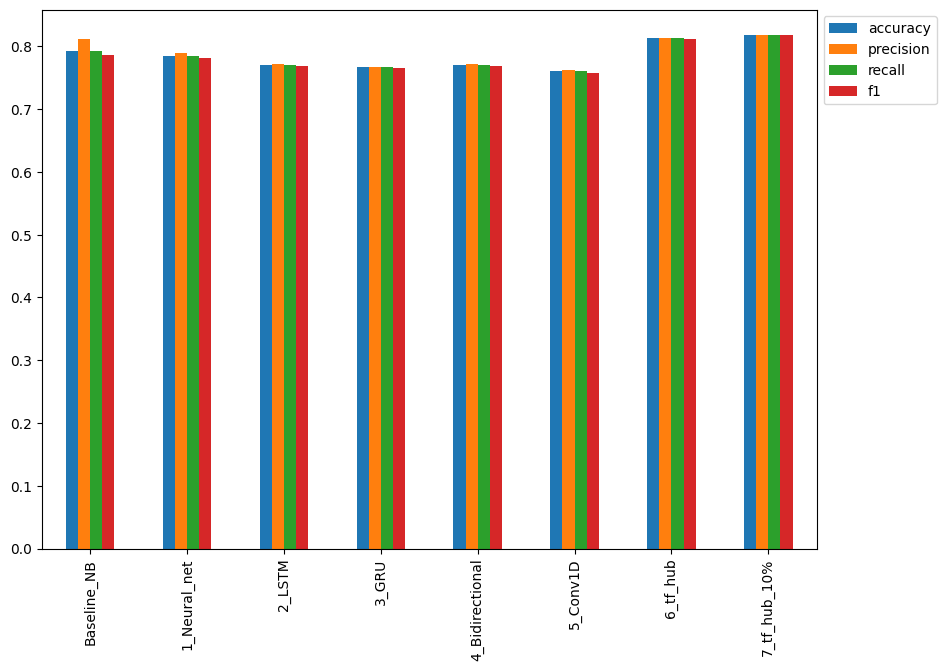

In [ ]:
all_models_results.plot(kind=("bar"), figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

<Axes: >

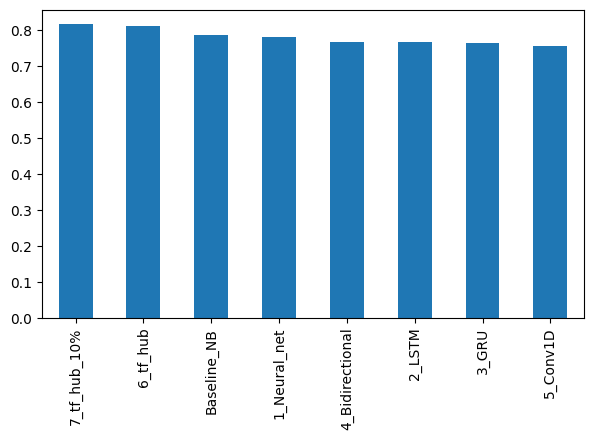

In [ ]:
all_models_results.sort_values('f1',ascending=False)['f1'].plot(kind='bar', figsize=(7, 4))

## View TensorBoard of all models

In [ ]:
"""
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modeling Experiments" \
  --description "Some NLP models that i trained" \
  --one_shot #exit the oploader once the oploading is finished
"""

2023-05-07 15:57:19.646262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/3VOcJKKLQrGiQWouyrXGPA/

[2023-05-07T15:57:22] Started scanning logdir.
[2023-05-07T15:57:32] Total uploaded: 210 scalars, 0 tensors, 7 binary objects (3.6 MB)
[2023-05-07T15:57:32] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/3VOcJKKLQrGiQWouyrXGPA/


In [ ]:
!tensorboard dev list

2023-05-07 16:01:39.313667: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/3VOcJKKLQrGiQWouyrXGPA/
	Name                 NLP Modeling Experiments
	Description          Some NLP models that i trained
	Id                   3VOcJKKLQrGiQWouyrXGPA
	Created              2023-05-07 15:57:22 (4 minutes ago)
	Updated              2023-05-07 15:57:32 (4 minutes ago)
	Runs                 14
	Tags                 5
	Scalars              210
	Tensor bytes         0
	Binary object bytes  3760914
Total: 1 experiment(s)


In [ ]:
##delete some experiment
#!tensorboard dev delete --experiment_id 3VOcJKKLQrGiQWouyrXGPA

## Saving and Loading trained models
There is two main format to save a model in TensorFlow:
1. HDF5 format
2. SaveModel format

### HDF5 format

In [ ]:
# save model_6 as h5
model_6.save("model_6.h5")

In [ ]:
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
loaded_model_6.evaluate(validation, validation_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4251 - accuracy: 0.8123


[0.42506933212280273, 0.8123359680175781]

In [ ]:
model_6_results

{'accuracy': 0.8123359580052494,
 'precision': 0.8129238565064447,
 'recall': 0.8123359580052494,
 'f1': 0.8114314841586915}

### SavedModel format

In [ ]:
# Save model_6 as saved model format
model_6.save("model_6_SaveModel_format")

In [ ]:
loaded_model_6_Model_format = tf.keras.models.load_model("model_6_SaveModel_format")

In [ ]:
loaded_model_6_Model_format.evaluate(validation, validation_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.4251 - accuracy: 0.8123


[0.42506933212280273, 0.8123359680175781]

In [ ]:
model_6_results

{'accuracy': 0.8123359580052494,
 'precision': 0.8129238565064447,
 'recall': 0.8123359580052494,
 'f1': 0.8114314841586915}

In [ ]:
"""

## To download some file on my lockal machine
from google.colab import files
files.download('/content/model_6_SaveModel_format')


"""

"\n\n## To download some file on my lockal machine \nfrom google.colab import files\nfiles.download('/content/model_6_SaveModel_format')\n\n\n"

## Finding the most wrong examples

In [ ]:
# Get some model from danial github to all be on the same page
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-05-07 16:32:43--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  22.7MB/s    in 42s     

2023-05-07 16:33:25 (22.0 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.inde

In [ ]:
model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')

In [ ]:
model_6_pretrained.evaluate(validation, validation_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# Make prediction with it
model_6_pretrained_pred_prob = model_6_pretrained.predict(validation)
model_6_pretrained_pred = tf.round(model_6_pretrained_pred_prob)
model_6_pretrained_pred[:10]

24/24 [==============================] - 1s 16ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
val_df = pd.DataFrame({"text":validation,
                       "target":validation_labels,
                       "pred":tf.squeeze(model_6_pretrained_pred),
                       "prob":tf.squeeze(model_6_pretrained_pred_prob)})
val_df.head()

,text,target,pred,prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("prob", ascending=False)
most_wrong[:10]  #These are false positive

,text,target,pred,prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail() #These are false nigative

,text,target,pred,prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
# Plot the false positive

for row in most_wrong[:10].itertuples():
  _,text, target, pred, prob = row
  print(f"Target: {target} , Pred: {pred} , Prob: {prob}")
  print(f"The text:\n{text}\n\n---\n")

Target: 0 , Pred: 1.0 , Prob: 0.9101957678794861
The text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

---

Target: 0 , Pred: 1.0 , Prob: 0.8769821524620056
The text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

---

Target: 0 , Pred: 1.0 , Prob: 0.8523001074790955
The text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

---

Target: 0 , Pred: 1.0 , Prob: 0.8354544043540955
The text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

---

Target: 0 , Pred: 1.0 , Prob: 0.8272132873535156
The text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

---

Target: 0 , Pred: 1.0 , Prob: 0.8148158192634583
The text:
@SonofLiberty357 all illuminated by the brightly burning buil

In [ ]:
for row in most_wrong.tail().itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target} , Pred: {pred} , Prob: {prob}")
  print(f"The text:\n{text}\n\n---\n")

Target: 1 , Pred: 0.0 , Prob: 0.043918490409851074
The text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

---

Target: 1 , Pred: 0.0 , Prob: 0.042086850851774216
The text:
I get to smoke my shit in peace

---

Target: 1 , Pred: 0.0 , Prob: 0.03899793699383736
The text:
Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy

---

Target: 1 , Pred: 0.0 , Prob: 0.03894945606589317
The text:
Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP

---

Target: 1 , Pred: 0.0 , Prob: 0.03718579187989235
The text:
Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube

---



## Predict on Text DataSet

In [ ]:
testing = test['text'].to_numpy()
testing

array(['Just happened a terrible car crash',
       'Heard about #earthquake is different cities, stay safe everyone.',
       'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
       ..., 'Green Line derailment in Chicago http://t.co/UtbXLcBIuY',
       'MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3',
       '#CityofCalgary has activated its Municipal Emergency Plan. #yycstorm'],
      dtype=object)

In [ ]:
model_6_pretrained_test_data_prob = model_6_pretrained.predict(testing)
model_6_pretrained_test_data_prob[:10]

102/102 [==============================] - 1s 9ms/step


array([[0.5199701 ],
       [0.8752513 ],
       [0.827833  ],
       [0.9335067 ],
       [0.9679583 ],
       [0.55563396],
       [0.0634278 ],
       [0.04510274],
       [0.04864756],
       [0.06176267]], dtype=float32)

In [ ]:
model_6_pretrained_test_data_pred = tf.round(model_6_pretrained_test_data_prob)
model_6_pretrained_test_data_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
testing_df = pd.DataFrame({"text": testing,
                           "pred":tf.squeeze(model_6_pretrained_test_data_pred),
                           "prob": tf.squeeze(model_6_pretrained_test_data_prob)})
testing_df.head()

,text,pred,prob
0,Just happened a terrible car crash,1.0,0.519970
1,"Heard about #earthquake is different cities, s...",1.0,0.875251
2,"there is a forest fire at spot pond, geese are...",1.0,0.827833
3,Apocalypse lighting. #Spokane #wildfires,1.0,0.933507
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.967958


In [ ]:
# plot the testing data with the model pridiction
for row in testing_df.head().itertuples():
  _, text, pred , prob= row
  print(f"The pred: {pred}, The prob: {prob}")
  print(f"The Text is:\n{text}\n\n ----\n")

The pred: 1.0, The prob: 0.5199701189994812
The Text is:
Just happened a terrible car crash

 ----

The pred: 1.0, The prob: 0.875251293182373
The Text is:
Heard about #earthquake is different cities, stay safe everyone.

 ----

The pred: 1.0, The prob: 0.8278329968452454
The Text is:
there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all

 ----

The pred: 1.0, The prob: 0.9335067272186279
The Text is:
Apocalypse lighting. #Spokane #wildfires

 ----

The pred: 1.0, The prob: 0.9679582715034485
The Text is:
Typhoon Soudelor kills 28 in China and Taiwan

 ----

